In [1]:
import sys

sys.path.append('PGM/source/')
import rbm

import numpy as np
import h5py
import matplotlib.pyplot as plt
import pickle

from utils import opt_leaf
import swap_sign_RBM as ssrbm

/SEC/ZebraFish/Tools_Analysis/RBM/PGM/source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM/PGM/source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM/PGM/source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM/PGM/source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


In [2]:
%matplotlib inline

## Load Data

In [3]:
h5path = "/SEC/ZebraFish/Data/thij/20180912_Run01_spontaneous_rbm2.h5"
#spikes = "/SEC/ZebraFish/Data/RBM/test_334293/20180912_Run01_spontaneous_rbm2__wb_spikes_only.npy"
spikes = "/SEC/ZebraFish/Data/RBM/test_334948/20180912_Run01_spontaneous_rbm2__wb_spikes_only.npy"
train_inds = "/SEC/ZebraFish/Data/RBM/test_334293/train_test_inds__test_segs_267_nseg10.pkl"
#RBM_path = "/SEC/ZebraFish/Data/RBM/test_334293/RBM3_20180912-Run01-spontaneous-rbm2_wb_test-segs-267-nseg10_M200_l1-2e-02_duration132026s_timestamp2021-07-02-2238.data"
RBM_path = "/SEC/ZebraFish/Data/RBM/test_334948/RBM3_20180912-Run01-spontaneous-rbm2_wb_test-segs-267-nseg10_M200_l1-2e-02_duration262966s_timestamp2021-07-08-1240.data"

In [4]:
tmp_RBM = pickle.load(open(RBM_path, 'rb'))
RBM = ssrbm.swap_sign_RBM(RBM=tmp_RBM, verbose=2)
rbm_weights =  RBM.weights.copy()

regions = np.arange(294)

file = h5py.File(h5path,"r")
labels = file["Data"]["Brain"]["Labels"][:] #[region x neurons]
spikes = file["Data"]["Brain"]["Analysis"]["ThresholdedSpikes"][:] # [time x neurons]
coords = file["Data"]["Brain"]["ZBrainCoordinates"][:].T # [neuron x xyz]
t = file["Data"]["Brain"]["Times"][:]

labeled = np.where(np.sum(labels,axis=0)>0)[0]

spikes = spikes[:,labeled]
labels = labels[:,labeled]
coords = coords[labeled]

109/200 HU weights are flipped
Flipped HUs are: (array([  1,   4,   5,   7,   9,  10,  12,  13,  14,  15,  16,  17,  18,
        20,  23,  24,  26,  27,  28,  29,  31,  32,  33,  35,  36,  38,
        41,  42,  43,  44,  45,  49,  50,  52,  55,  56,  58,  59,  62,
        63,  64,  65,  69,  71,  76,  77,  81,  85,  87,  90,  92,  94,
        98, 100, 102, 104, 105, 106, 109, 110, 111, 112, 113, 114, 116,
       120, 121, 123, 124, 125, 126, 131, 133, 134, 135, 136, 139, 144,
       145, 147, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161,
       164, 165, 168, 170, 174, 175, 176, 179, 180, 182, 183, 186, 188,
       191, 193, 196, 197, 198]),)


In [5]:
RBM = pickle.load(open(RBM_path, 'rb'))

In [6]:
d = pickle.load(open(train_inds,'rb'))
print(f"Train : {d['train_inds'].shape}\nTest : {d['test_inds'].shape}")

Train : (3888,)
Test : (1665,)


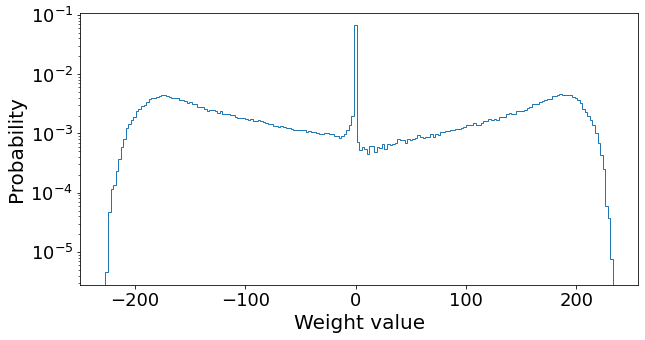

In [7]:
%matplotlib inline
assert np.sum(np.isnan(RBM.weights)) == 0
fig,ax = plt.subplots(figsize=(10,5))
h = ax.hist(RBM.weights.ravel(), bins=200, density=True, histtype='step',log=True)
ax.set_xlabel('Weight value',fontsize=20)
ax.set_ylabel('Probability',fontsize=20)
ax.tick_params(axis="both", labelsize=18)

In [8]:
h = RBM.mean_hiddens(spikes)

/SEC/ZebraFish/Tools_Analysis/RBM/PGM/source/layer.py:1188: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)


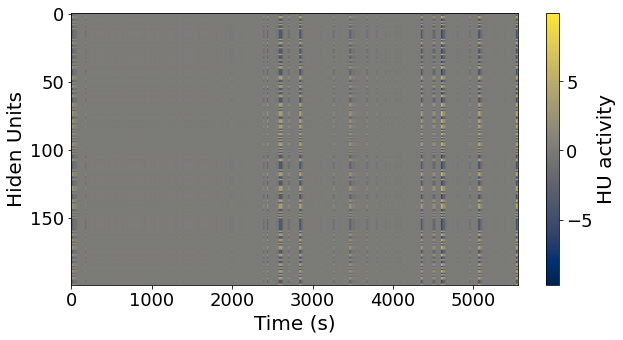

In [9]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,5))

a = ax.imshow(h.T,aspect="auto",cmap='cividis')
c = plt.colorbar(a, ax=ax)
c.ax.tick_params(labelsize=18)

ax.set_ylabel("Hiden Units",fontsize=20)
ax.set_xlabel('Time (s)',fontsize=20)
c.set_label(label="HU activity", fontsize=20)
ax.tick_params(axis="both", labelsize=18)

## Small tests

In [17]:
print(f"RBM :\n\tnb_neurons : {RBM.weights.shape[1]}\n\tnb_hu : {RBM.weights.shape[0]}")
print(f"Data :\n\tnb_neurons : {spikes.shape[1]}\n\tnb_steps : {spikes.shape[0]}")

RBM :
	nb_neurons : 52518
	nb_hu : 200
Data :
	nb_neurons : 52518
	nb_steps : 5553


In [18]:
RBM.count_updates

140439

'ADAM'

In [11]:
hu_act = np.transpose(RBM.mean_hiddens(spikes)) #[hu x time]
ol, tmp = opt_leaf(hu_act)

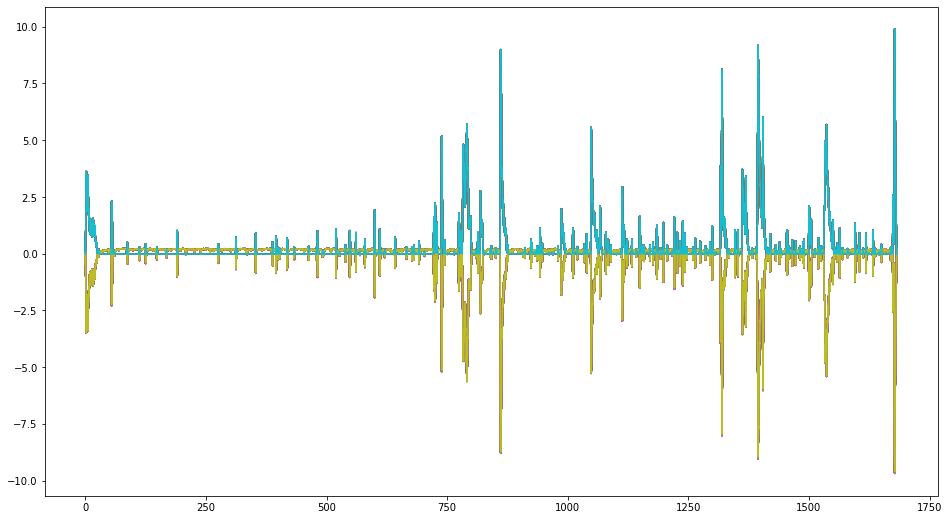

In [12]:
%matplotlib inline
fig,axs = plt.subplots(figsize=(16,9))
for i in range(RBM.n_h):
    axs.plot(t,hu_act[i])

## What about the weights ?

Text(0.5, 0, 'weights')

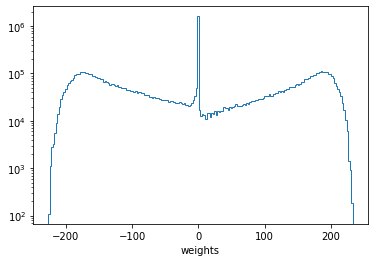

In [13]:
h = plt.hist(RBM.weights.ravel(),bins=200,log=True,histtype='step')
plt.xlabel("weights")

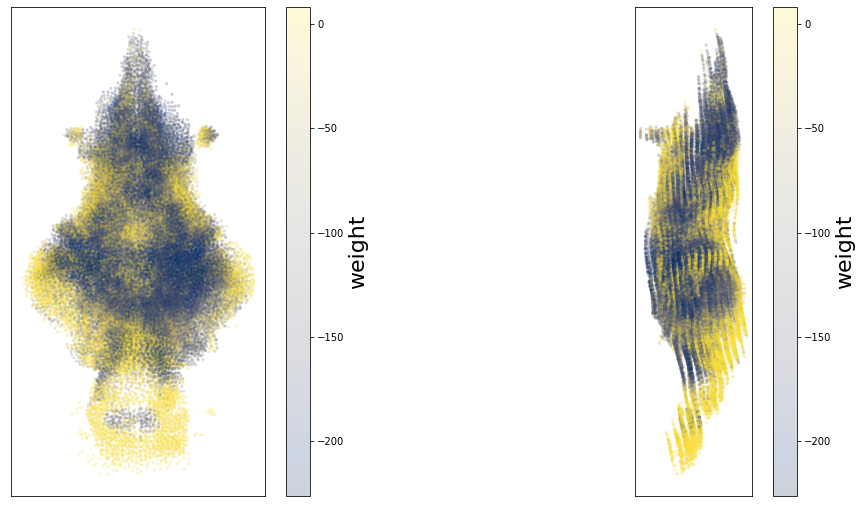

In [14]:
hu = 18
ws = RBM.weights[hu]

fig, axs = plt.subplots(ncols=2, figsize=(16, 9))

ax = axs[0]
ax.set_aspect("equal")
a = ax.scatter(
    coords[:, 0],
    coords[:, 1],
    s=5,
    alpha=0.2,
    c=ws,
    cmap="cividis",
)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
c = plt.colorbar(a, ax=ax)
c.set_label(label="weight", fontsize=22)

ax = axs[1]
ax.set_aspect("equal")
a = ax.scatter(
    coords[:, 2],
    coords[:, 1],
    s=5,
    alpha=0.2,
    c=ws,
    cmap="cividis",
)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
c = plt.colorbar(a, ax=ax)
c.set_label(label="weight", fontsize=22)

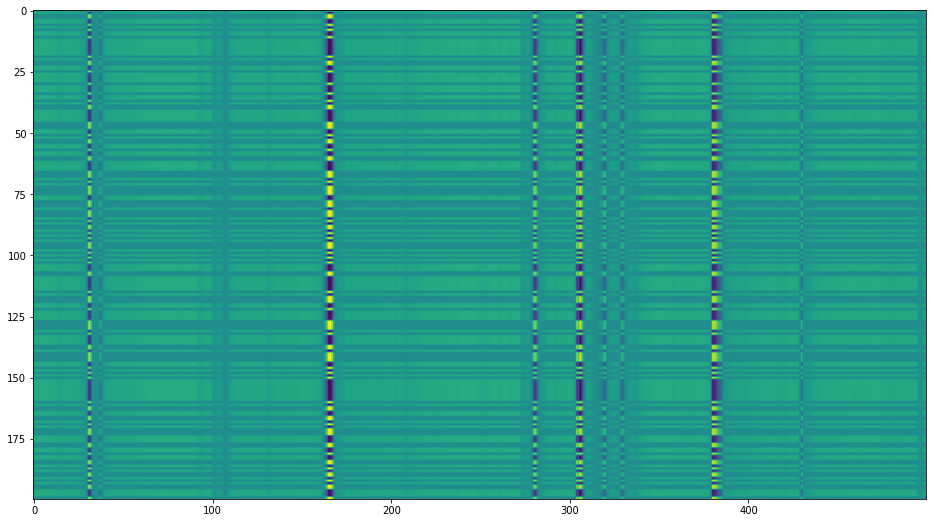

In [15]:
fig,axs = plt.subplots(figsize=(16,9))
axs.imshow(hu_act[:,1000:1500],aspect="auto")

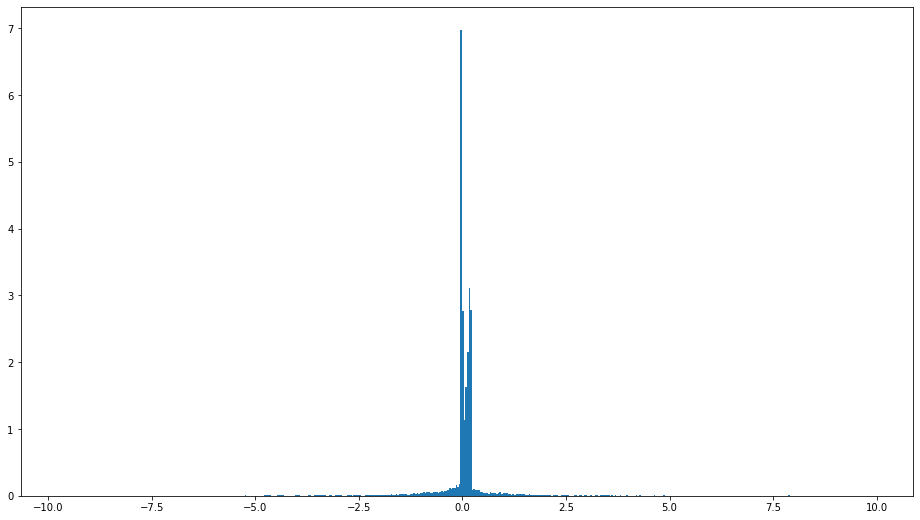

In [16]:
fig,axs = plt.subplots(figsize=(16,9))
h = axs.hist(hu_act.ravel(),bins=500,density=True,stacked=True)